In [261]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [262]:
experiments = raw_input("experiments ") 
experiments = experiments.split(",")

experiments 6,7,8,10,11,12,13


In [263]:
dirs = []
for exp in experiments:
    print exp
    experiment_root = "processed/experiment_" + str(exp) + "/"
    sub_dir = [x[0] for x in os.walk(experiment_root)]
    dirs.extend(sub_dir)
    #mfcc_root = experiment_root +

6
7
8
10
11
12
13


In [264]:
dirs

['processed/experiment_6/',
 'processed/experiment_6/1',
 'processed/experiment_6/1/testing_phase',
 'processed/experiment_6/1/testing_phase/visual',
 'processed/experiment_6/1/preprocess',
 'processed/experiment_6/1/preprocess/visual',
 'processed/experiment_6/1/training_phase',
 'processed/experiment_6/1/training_phase/mfccs',
 'processed/experiment_6/1/training_phase/visual',
 'processed/experiment_7/',
 'processed/experiment_7/2',
 'processed/experiment_7/2/testing_phase',
 'processed/experiment_7/2/testing_phase/visual',
 'processed/experiment_7/2/preprocess',
 'processed/experiment_7/2/preprocess/visual',
 'processed/experiment_7/2/training_phase',
 'processed/experiment_7/2/training_phase/mfccs',
 'processed/experiment_7/2/training_phase/visual',
 'processed/experiment_8/',
 'processed/experiment_8/3',
 'processed/experiment_8/3/testing_phase',
 'processed/experiment_8/3/testing_phase/visual',
 'processed/experiment_8/3/preprocess',
 'processed/experiment_8/3/preprocess/visual',

In [265]:
mfcc_dirs = []
for sd in dirs:
    if "mfcc" in sd:
        print sd
        mfcc_dirs.append(sd)

processed/experiment_6/1/training_phase/mfccs
processed/experiment_7/2/training_phase/mfccs
processed/experiment_8/3/training_phase/mfccs
processed/experiment_10/5/training_phase/mfccs
processed/experiment_11/4/training_phase/mfccs
processed/experiment_12/3/training_phase/mfccs
processed/experiment_13/2/training_phase/mfccs


In [266]:
mfcc_dirs.sort()

In [267]:
mfcc_dirs

['processed/experiment_10/5/training_phase/mfccs',
 'processed/experiment_11/4/training_phase/mfccs',
 'processed/experiment_12/3/training_phase/mfccs',
 'processed/experiment_13/2/training_phase/mfccs',
 'processed/experiment_6/1/training_phase/mfccs',
 'processed/experiment_7/2/training_phase/mfccs',
 'processed/experiment_8/3/training_phase/mfccs']

In [268]:
mfcc_paths = []
for x1 in mfcc_dirs:
    #print x1
    #print os.listdir(str(x1))
    file_names = os.listdir(str(x1))
    for fn in file_names:
        mfcc_paths.append([x1+"/"+fn])
    #pd.read_csv(mfcc_dirs+mfcc_file)
    
#remove any checkpoint files
#for mp in mfcc_paths:
#    if "ipynb" in mp[0]:
#        print mp
#       mfcc_paths.remove(mp)

In [269]:
mfcc_paths

[['processed/experiment_10/5/training_phase/mfccs/bedroom_env10_5_5'],
 ['processed/experiment_10/5/training_phase/mfccs/bedroom_env10_5_4'],
 ['processed/experiment_10/5/training_phase/mfccs/bedroom_env10_5_3'],
 ['processed/experiment_10/5/training_phase/mfccs/bedroom_env10_5_2'],
 ['processed/experiment_10/5/training_phase/mfccs/bedroom_env10_5_1'],
 ['processed/experiment_10/5/training_phase/mfccs/bedroom_env10_5_0'],
 ['processed/experiment_11/4/training_phase/mfccs/bedroom_env11_4_31'],
 ['processed/experiment_11/4/training_phase/mfccs/bedroom_env11_4_32'],
 ['processed/experiment_11/4/training_phase/mfccs/bedroom_env11_4_27'],
 ['processed/experiment_11/4/training_phase/mfccs/bedroom_env11_4_30'],
 ['processed/experiment_11/4/training_phase/mfccs/bedroom_env11_4_29'],
 ['processed/experiment_11/4/training_phase/mfccs/bedroom_env11_4_28'],
 ['processed/experiment_12/3/training_phase/mfccs/bedroom_env12_3_4'],
 ['processed/experiment_12/3/training_phase/mfccs/bedroom_env12_3_0'],


In [270]:
features = pd.DataFrame()
for fls in mfcc_paths:
    df = pd.DataFrame(pd.read_csv(fls[0],header=None).values.reshape(-1))
    df = df.T
    df.index = [fls[0].split("/")[5].split("_")[1]]
    features = pd.concat([features,df],axis=0)

In [271]:
features

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
env10,27.005664,24.342006,32.060695,7.778535,6.772229,16.452672,20.745764,8.424605,18.690760,41.248341,...,51.849662,5.870668,64.106700,7.652570,5.021643,0.490085,0.370837,-6.439723,-11.971908,-13.290912
env10,25.393218,37.257734,44.990482,44.521369,37.088648,44.569281,31.750077,7.887375,11.579358,5.971042,...,-4.828449,0.807088,2.715736,18.148008,6.204197,24.939279,1.423357,-1.390350,-6.264296,-4.152541
env10,29.456291,26.651606,22.933727,18.815056,16.415624,14.218668,13.271921,13.725962,15.460681,16.950127,...,35.216636,43.554967,61.048884,27.842642,12.969687,9.054031,4.574404,-0.513981,-5.781781,-5.267013
env10,29.708510,28.133954,25.066091,21.478933,18.449582,15.636548,13.726108,12.883795,14.023094,15.471767,...,13.363861,33.732977,100.195065,64.625358,21.879183,7.964901,1.688144,-3.049969,-7.472409,-9.253673
env10,32.348199,28.405727,23.730926,19.467472,16.062037,13.141139,12.304194,13.524556,15.374477,17.415974,...,59.919268,97.195614,38.124862,14.294088,2.945251,-0.873641,-3.717519,-6.248728,-8.282749,-9.490818
env10,20.178146,19.938950,16.367847,10.477308,5.248282,-7.507537,-3.626730,14.564520,17.039755,14.385977,...,69.585160,0.223215,-68.117772,-1.324984,-12.507010,-9.837508,-4.378479,69.981255,73.704359,23.712049
env11,25.369438,27.568566,27.576265,26.736575,24.709636,21.746940,19.284484,16.177320,11.941370,8.522922,...,-4.663429,-3.630531,-4.107691,-7.485704,-32.999796,-28.532694,-11.928360,-7.113384,-7.599870,-6.618005
env11,27.091096,28.018660,27.247593,25.003794,21.442852,17.807277,13.022724,9.159059,4.035082,6.788897,...,2.518905,-2.108435,-13.072401,-61.855467,-55.902519,-16.073775,0.557653,3.133935,4.522202,5.721152
env11,26.955084,20.245960,23.620489,25.301980,25.299919,23.217352,16.632588,10.724866,29.179870,30.926702,...,-9.058845,21.434262,6.367519,8.233250,5.586158,6.893335,3.186924,1.661514,20.852503,8.063661
env11,27.084590,23.919365,20.578492,16.638055,13.138715,12.939689,15.996826,17.866824,19.650989,19.848543,...,38.641976,14.899362,2.737570,-3.801431,-6.677028,-8.826105,-9.938213,-10.602606,-10.197146,-8.758547


In [272]:
out = np.corrcoef(features)

In [273]:
out

array([[1.        , 0.24817503, 0.56121181, ..., 0.35334123, 0.53648802,
        0.47481653],
       [0.24817503, 1.        , 0.2563511 , ..., 0.23888849, 0.20728599,
        0.26191607],
       [0.56121181, 0.2563511 , 1.        , ..., 0.54744369, 0.84292273,
        0.53246243],
       ...,
       [0.35334123, 0.23888849, 0.54744369, ..., 1.        , 0.60816348,
        0.70407084],
       [0.53648802, 0.20728599, 0.84292273, ..., 0.60816348, 1.        ,
        0.53102504],
       [0.47481653, 0.26191607, 0.53246243, ..., 0.70407084, 0.53102504,
        1.        ]])

In [274]:
import scipy 
from scipy.stats import pearsonr
cor, _ = pearsonr(df.values.reshape(-1), df.values.reshape(-1))

In [275]:
len(features.index)

130

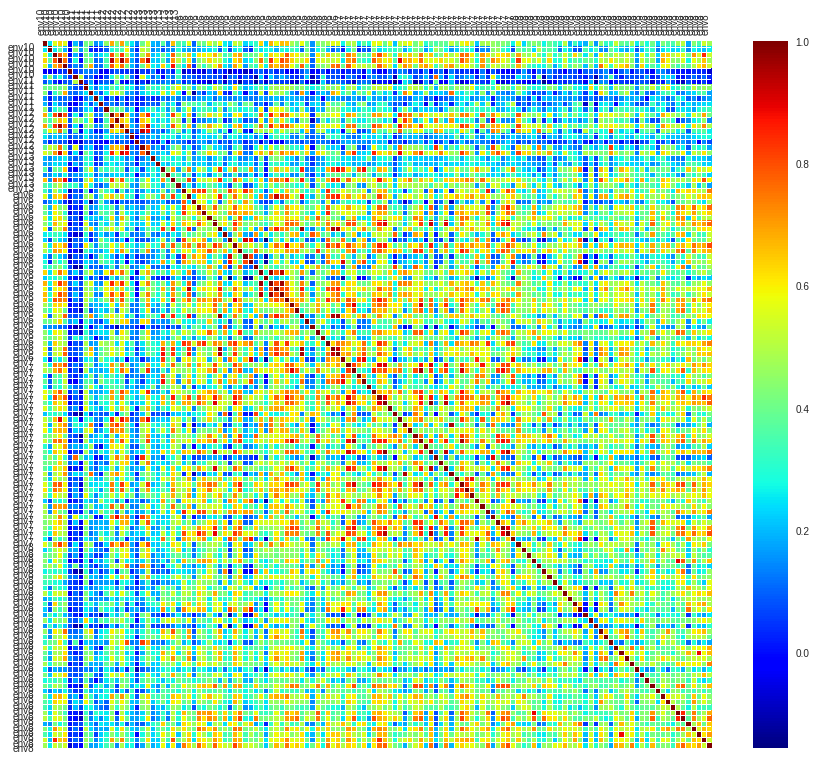

In [276]:
plt.figure(figsize=(15,13))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.xticks(range(len(out)),features.index, rotation='vertical')
plt.yticks(range(len(out)),features.index[::-1], rotation='horizontal')

plt.imshow(out,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(out),0,len(out)], aspect='auto')
plt.colorbar()

In [277]:
len(out)

130